<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Regresión

Programa creado para mostrar ejemplos prácticos de los visto durante la clase<br>
v1.1

# Machine Learning supervisado - Regresión

## 1 - Datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.DataFrame({
      "x": [1, 5, 10, 15, 20, 25, 30],
      "y": [5, 12, 11, 23, 19, 28, 36]}
      )
df

,x,y
0,1,5
1,5,12
2,10,11
3,15,23
4,20,19
5,25,28
6,30,36


In [3]:
# Separar los datos "X" e y
X = df['x'].values
y = df['y'].values

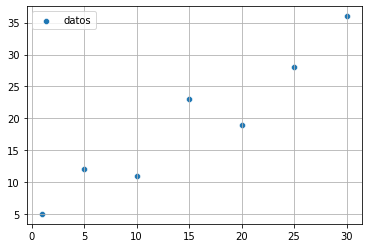

In [4]:
# Graficar
fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=X, y=y, label='datos', ax=ax)
ax.legend()
ax.grid('dashed')
plt.show()

## 2 - Modelo Base (promediador)

In [5]:
# Creamos el modelo base
class MeanBaseModel():
    def __init__(self):
        self.W = 0

    def fit(self, X, y):
        self.W = np.mean(y / X)

    def predict(self, X):
        return X * self.W

In [6]:
# Entrenar nuestro modelo base (un promediador)
mean_model = MeanBaseModel()
mean_model.fit(X, y)
y_hat_base = mean_model.predict(X)
print(f"Pendiente (W1): {mean_model.W:.2f}")

Pendiente (W1): 1.90


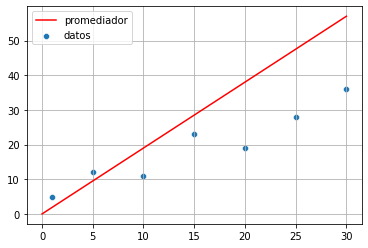

In [7]:
# Graficar
m1 = mean_model.W
b1 = 0
lx1 = np.array([0, X.max()])
ly1 = lx1 * m1 + b1

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=X, y=y, label='datos', ax=ax)
sns.lineplot(x=lx1, y=ly1, label='promediador', color='r', ax=ax)
ax.legend()
ax.grid('dashed')
plt.show()

## 3 - Regresión lineal (y = m*x + b)

In [8]:
from sklearn.linear_model import LinearRegression
# Regresión lineal
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
y_hat= lr.predict(X.reshape(-1, 1))
print(f"Pendiente (W1): {lr.coef_[0]:.2f}")
print(f"Ordenada al origen (W0): {lr.intercept_:.2f}")

Pendiente (W1): 0.97
Ordenada al origen (W0): 4.45


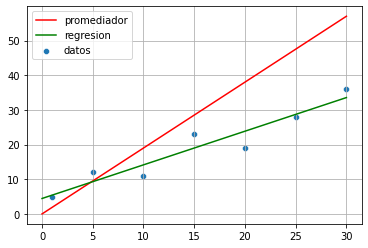

In [9]:
# Graficar
m1 = mean_model.W
b1 = 0
lx1 = np.array([0, X.max()])
ly1 = lx1 * m1 + b1

m2 = lr.coef_
b2 = lr.intercept_
lx2 = np.array([0, X.max()])
ly2 = lx2 * m2 + b2

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=X, y=y, label='datos', ax=ax)
sns.lineplot(x=lx1, y=ly1, label='promediador', color='r', ax=ax)
sns.lineplot(x=lx2, y=ly2, label='regresion', color='g', ax=ax)
ax.legend()
ax.grid('dashed')
plt.show()

## 4 - Métricas para la regresión

In [10]:
from sklearn.metrics import r2_score
lr_r2 = r2_score(y, y_hat)
base_r2 = r2_score(y, y_hat_base)
print(f"Promediador: coeficiente de determinación: {base_r2:.2f}")
print(f"Regresión: coeficiente de deterinación: {lr_r2:.2f}")

Promediador: coeficiente de determinación: -0.86
Regresión: coeficiente de deterinación: 0.91


## 5 - Regresión multilineal
Ver el notebook de ejemplo correspondiente

## 6 - Regresión polinomial

In [11]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)

n_samples = 30
degrees_to_plot = [1, 4, 15]

X_train = np.sort(np.random.rand(n_samples))
y_train = true_fun(X_train) + np.random.randn(n_samples) * 0.2

X_test = np.linspace(0, 1, 100)
y_test = true_fun(X_test)

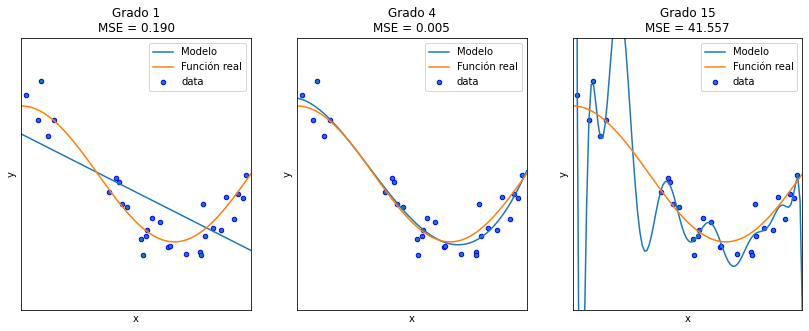

In [13]:
from sklearn.metrics import mean_squared_error

mse_train_list = []
mse_test_list = []
max_dregree = max(degrees_to_plot)

plt.figure(figsize=(14, 5))
for degree in range(1, (max_dregree+1)):

    plot_number = 0
    try:
        plot_number = degrees_to_plot.index(degree) + 1
    except:
        plot_number = 0

    if plot_number > 0:
        ax = plt.subplot(1, len(degrees_to_plot), plot_number)
        plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures()
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
    X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))

    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_hat = lr.predict(X_test_poly)
    y_hat_train = lr.predict(X_train_poly)

    mse = mean_squared_error(y_test, y_hat)
    mse_train = mean_squared_error(y_train, y_hat_train)

    mse_train_list.append(mse_train)
    mse_test_list.append(mse)

    if plot_number > 0:
        plt.plot(X_test, y_hat, label="Modelo")
        plt.plot(X_test, y_test, label="Función real")
        plt.scatter(X_train, y_train, edgecolor='b', s=20, label="data")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title("Grado {}\nMSE = {:.3f}".format(degree, mse))

plt.show()

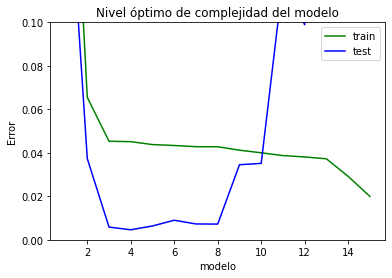

Nivel óptimo: 4


In [14]:
plt.plot(range(1, (max_dregree+1)), mse_train_list, c='g', label="train")
plt.plot(range(1, (max_dregree+1)), mse_test_list, c='b', label="test")
plt.xlabel("modelo")
plt.ylabel("Error")
plt.ylim((0, 0.1))
plt.legend()
plt.title("Nivel óptimo de complejidad del modelo")
plt.show()
print('Nivel óptimo:', mse_test_list.index(min(mse_test_list))+1)

## 7 - Regresión con gradiente descendente

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
scaler = MinMaxScaler()
scaler.fit(X.reshape(-1, 1))
X_norm = scaler.transform(X.reshape(-1, 1))

reg = SGDRegressor(max_iter=1000, tol=0.01)
reg.fit(X_norm, y)
y_hat = reg.predict(X_norm)

print(f"Pendiente (W1): {reg.coef_[0]:.2f}")
print(f"Ordenada al origen (W0):", reg.intercept_)
print("Ojo! Los coeficientes fueron afectados por la normalización, no es conveniente utilizarlos")

Pendiente (W1): 17.73
Ordenada al origen (W0): [10.99957123]
Ojo! Los coeficientes fueron afectados por la normalización, no es conveniente utilizarlos


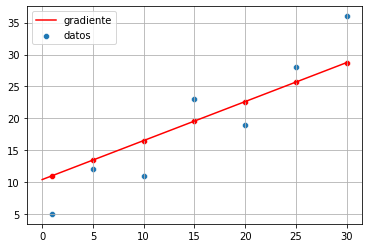

In [16]:
lx3 = np.array([0, X.max()])
lx3_norm = scaler.transform(lx3.reshape(-1, 1))
ly3 = reg.predict(lx3_norm)

fig = plt.figure()
ax = fig.add_subplot()
sns.scatterplot(x=X, y=y, label='datos', ax=ax)
sns.scatterplot(x=X, y=y_hat, color='r', ax=ax)
sns.lineplot(x=lx3, y=ly3, label='gradiente', color='r', ax=ax)
ax.legend()
ax.grid('dashed')
plt.show()

In [17]:
from sklearn.metrics import r2_score
reg_r2 = r2_score(y, y_hat)
print(f"Gradiente: coeficiente de deterinación: {reg_r2:.2f}")

Gradiente: coeficiente de deterinación: 0.78
